## Experiments: Sensitive Analysis Hyperparameter RSAST:


It is runned RSAST in a set of UCR datasets with a predefined number of runs ("runs"). Then, it is selected a range ("range_total") between 1, 10, 30 ,50 and 100 for the selected dataset.

In [46]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nir

In [47]:
from sast import *
import pandas as pd
import researchpy
import math
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Datasets

In [48]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]


In [49]:
df_other_methods['method'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet',
       'ProximityForest', 'WEASEL', 'Catch22', 'cBOSS'], dtype=object)

In [50]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')


# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)


/tmp/ipykernel_16432/371163348.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_16432/371163348.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_16432/371163348.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_16432/371163348.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_16432/371163348.py:26: FutureWarning: The default value of rege

In [51]:
#create dataset to generate cd diagram
df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
#df_perf.classifier_name.unique()

In [52]:
#filter dataset for cd-diagrams with the ds that has already tested all combinations of params
param_per_ds=pd.pivot_table(df_perf, index=['dataset_name'],values=['classifier_name'] ,aggfunc='count')
param_per_ds=param_per_ds.reset_index()
complete_ds=param_per_ds[param_per_ds.classifier_name==max(param_per_ds.classifier_name)]["dataset_name"].unique()

complete_ds=complete_ds.tolist()

#complete_ds.remove('DistalPhalanxOutlineCorrect')

#df_perf=df_perf[df_perf.dataset_name.isin(complete_ds)]
#df_result=df_result[df_result.dataset_name.isin(complete_ds)]


In [53]:
#get ds tested overall
df_result['dataset_name'].unique()

array(['SonyAIBORobotSurface2', 'GunPoint', 'Chinatown', 'Fungi',
       'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup',
       'SyntheticControl', 'Coffee', 'SmoothSubspace', 'ShapeletSim',
       'ItalyPowerDemand'], dtype=object)

In [54]:
#get columns of generated datasets
df_result.columns.unique()

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [55]:
#get ds tested overall
df_perf['dataset_name'].unique()

array(['Chinatown', 'Coffee', 'DistalPhalanxOutlineAgeGroup',
       'DistalPhalanxOutlineCorrect', 'Fungi', 'GunPoint',
       'ItalyPowerDemand', 'ShapeletSim', 'SmoothSubspace',
       'SonyAIBORobotSurface2', 'SyntheticControl'], dtype=object)

In [56]:
#get columns of generated datasets
df_perf.columns.unique()

Index(['classifier_name', 'dataset_name', 'accuracy'], dtype='object')

### Hyperparameter Tunning RSAST 

#### Accuracy: Subsequence Lenght Method 

In [84]:
filter_param=df_result

#filter_param=filter_param[filter_param.len_method=='ACF&PACF']
filter_param.dataset_name.unique()

array(['SonyAIBORobotSurface2', 'GunPoint', 'Chinatown', 'Fungi',
       'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup',
       'SyntheticControl', 'Coffee', 'SmoothSubspace', 'ShapeletSim',
       'ItalyPowerDemand'], dtype=object)

In [85]:
filter_param.rpoint.unique()

array(['1', 'half_len', '10', '30', '50', '100', '1000', '10000'],
      dtype=object)

In [86]:
filter_param=filter_param[filter_param.rpoint=='half_len']

In [87]:
filter_param.nb_per_class.unique()

array(['1', 'half_instance', '10', '30', '50', '100', '1000', '10000'],
      dtype=object)

In [89]:
filter_param=filter_param[filter_param.nb_per_class=='30']

In [90]:
# create a pivot table with the mean of score by dataset
len_method_vs_ds=pd.pivot_table(filter_param, values='accuracy', index=['len_method'],columns=['dataset_name'], aggfunc='mean')
len_method_vs_ds=np.transpose(len_method_vs_ds)#[['ACF','PACF']]
len_method_vs_ds=len_method_vs_ds.reset_index()
df_rocket=df_other_methods[df_other_methods["method"]=="ROCKET"]
merged_df = len_method_vs_ds.merge(df_rocket,left_on='dataset_name', right_on='dataset',  how='left')
merged_df=merged_df.drop('dataset',axis=1)
merged_df


,dataset_name,ACF,ACF&PACF,Max ACF,Max PACF,None,PACF,score,method
0,Chinatown,0.977648,0.985423,0.966958,0.984451,0.957240,0.983479,0.982507,ROCKET
1,Coffee,0.964286,1.000000,1.000000,0.928571,1.000000,1.000000,1.000000,ROCKET
2,DistalPhalanxOutlineAgeGroup,0.714628,0.717026,0.750600,0.724221,0.719424,0.695444,0.748201,ROCKET
3,DistalPhalanxOutlineCorrect,0.688406,0.716184,0.716184,0.733092,0.733092,0.727053,0.771739,ROCKET
4,Fungi,0.136201,1.000000,0.146953,0.930108,0.892473,1.000000,NaN,NaN
5,GunPoint,0.817778,0.986667,0.862222,0.973333,0.966667,0.980000,1.000000,ROCKET
6,ItalyPowerDemand,0.953353,0.945578,0.953029,0.947846,0.955296,0.950113,0.968902,ROCKET
7,ShapeletSim,0.987037,0.883333,0.988889,0.811111,0.687037,0.883333,1.000000,ROCKET
8,SmoothSubspace,0.897778,0.931111,0.891111,0.908889,0.871111,0.920000,0.980000,ROCKET
9,SonyAIBORobotSurface2,0.846100,0.911508,0.820217,0.883526,0.855544,0.911158,0.916055,ROCKET


In [91]:

# Summary statistics for a Series (single variable)
researchpy.summary_cont(filter_param.groupby(['len_method'])['accuracy'], conf = 0.95)

,N,Mean,SD,SE,95% Conf.,Interval
len_method,,,,,,
ACF,33,0.8090,0.2377,0.0414,0.7247,0.8933
ACF&PACF,33,0.9134,0.1011,0.0176,0.8776,0.9493
Max ACF,33,0.8201,0.2350,0.0409,0.7367,0.9034
Max PACF,33,0.8903,0.0905,0.0158,0.8582,0.9223
None,33,0.8751,0.1187,0.0207,0.8330,0.9171
PACF,33,0.9110,0.1027,0.0179,0.8745,0.9474


In [92]:
stats = filter_param.groupby(['len_method'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats.head(10))

                mean  count       std   ci95_hi   ci95_lo
len_method                                               
ACF         0.808979     33  0.237717  0.890086  0.727872
ACF&PACF    0.913449     33  0.101079  0.947936  0.878962
Max ACF     0.820055     33  0.234967  0.900224  0.739886
Max PACF    0.890266     33  0.090483  0.921138  0.859394
None        0.875060     33  0.118690  0.915556  0.834564
PACF        0.910962     33  0.102721  0.946010  0.875914


#### Generate Boxplot Tunning Hyperparameter

In [93]:
df_result.nb_per_class.unique()

array(['half_instance', '1', '10', '30', '50', '100', '1000', '10000'],
      dtype=object)

In [94]:
df_result.len_method.unique()

array(['ACF&PACF', 'ACF', 'PACF', 'Max ACF', 'Max PACF', 'None'],
      dtype=object)

rpoint          1         10         30         50        100      1000  \
count   11.000000  11.000000  11.000000  11.000000  11.000000  6.000000   
mean     0.902055   0.907906   0.915032   0.912653   0.916525  0.960390   
std      0.092520   0.102781   0.100017   0.099374   0.097708  0.046761   
min      0.708937   0.708937   0.706522   0.717391   0.719807  0.900665   
25%      0.889362   0.892575   0.913295   0.897195   0.911556  0.919864   
50%      0.927778   0.948494   0.945578   0.947846   0.949142  0.979728   
75%      0.955637   0.974798   0.977222   0.976116   0.980282  0.996667   
max      1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   

rpoint     10000   half_len  
count   6.000000  11.000000  
mean    0.962565   0.912648  
std     0.044388   0.101888  
min     0.899965   0.710386  
25%     0.929412   0.905176  
50%     0.981046   0.946615  
75%     0.996111   0.973909  
max     1.000000   1.000000  
rpoint          1         10         30         50    

/tmp/ipykernel_16432/10919453.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


rpoint          1         10         30         50        100  1000  10000  \
count   11.000000  11.000000  11.000000  11.000000  11.000000   0.0    0.0   
mean     0.901302   0.909339   0.909958   0.911392   0.911342   NaN    NaN   
std      0.096641   0.101729   0.106348   0.104406   0.104578   NaN    NaN   
min      0.726619   0.712230   0.700240   0.709832   0.697842   NaN    NaN   
25%      0.868574   0.892770   0.898696   0.897222   0.899571   NaN    NaN   
50%      0.943311   0.946226   0.949789   0.951085   0.949142   NaN    NaN   
75%      0.968273   0.976948   0.980143   0.981254   0.980143   NaN    NaN   
max      1.000000   1.000000   1.000000   1.000000   1.000000   NaN    NaN   

rpoint   half_len  
count   11.000000  
mean     0.910962  
std      0.105837  
min      0.695444  
25%      0.897246  
50%      0.950113  
75%      0.981740  
max      1.000000  
rpoint          1         10         30         50        100  1000  10000  \
count   11.000000  11.000000  11.000000

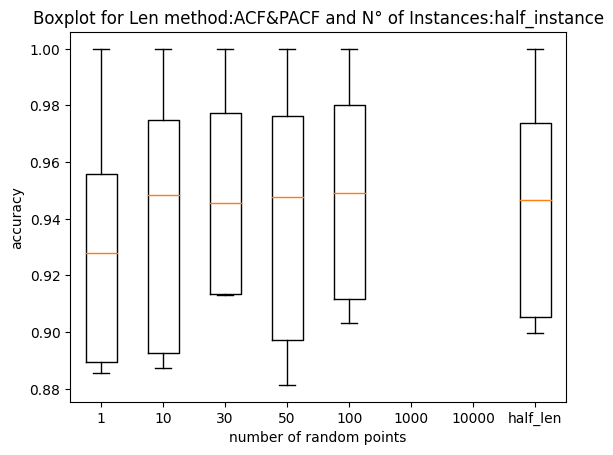

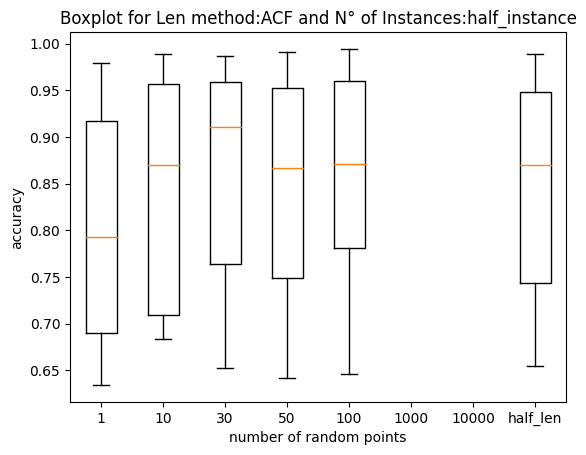

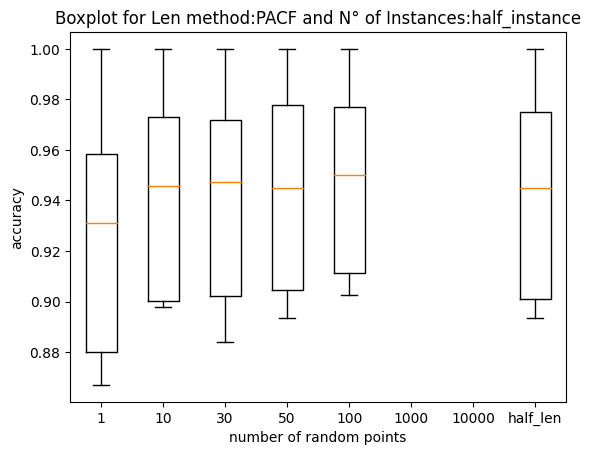

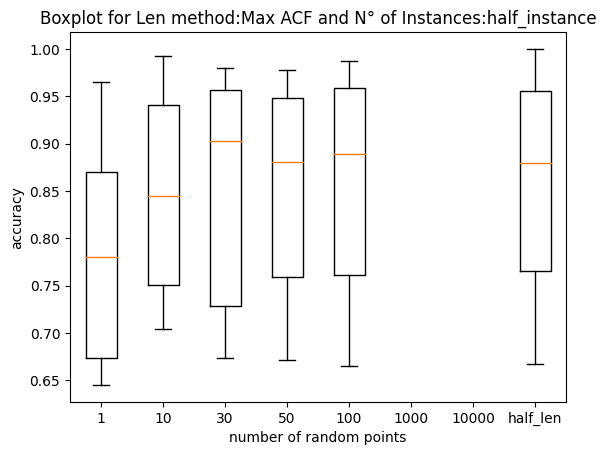

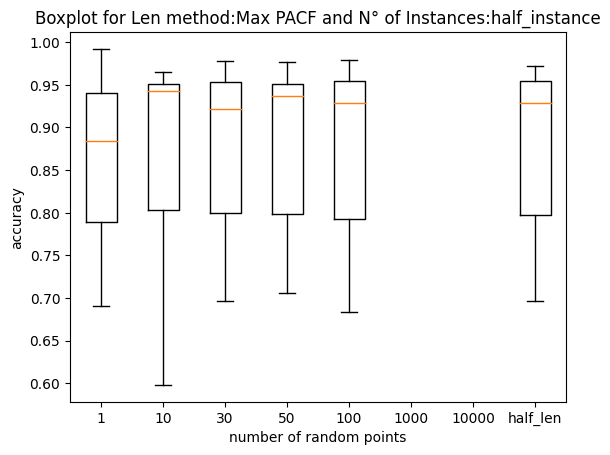

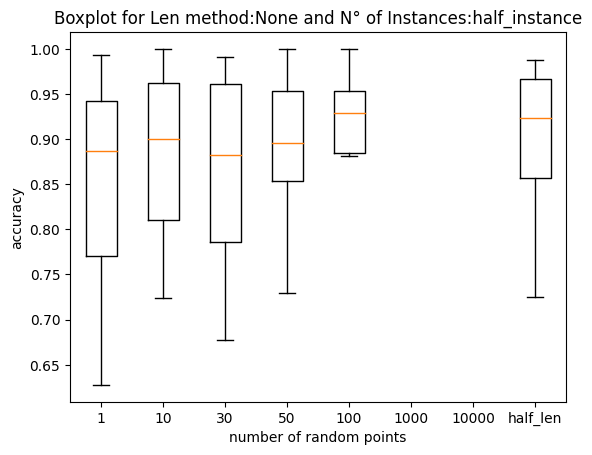

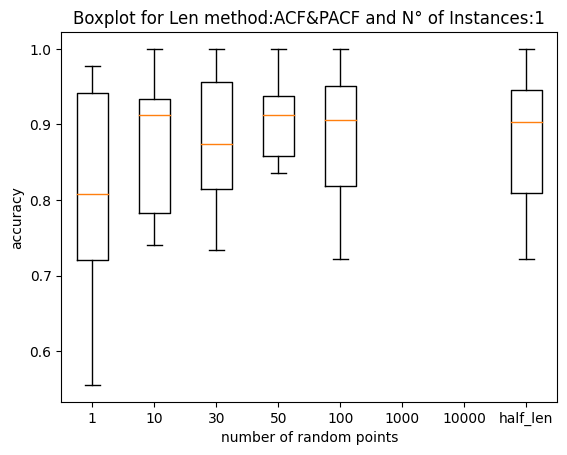

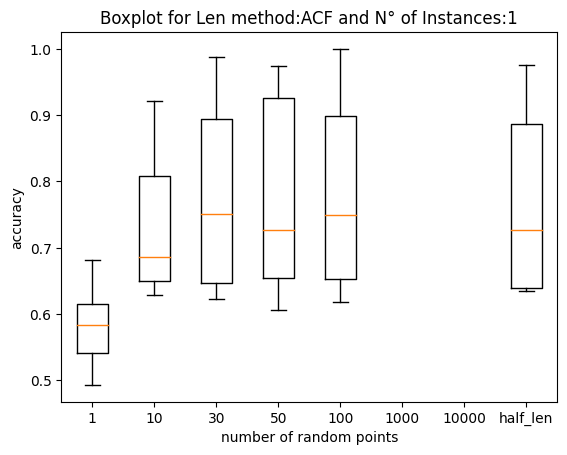

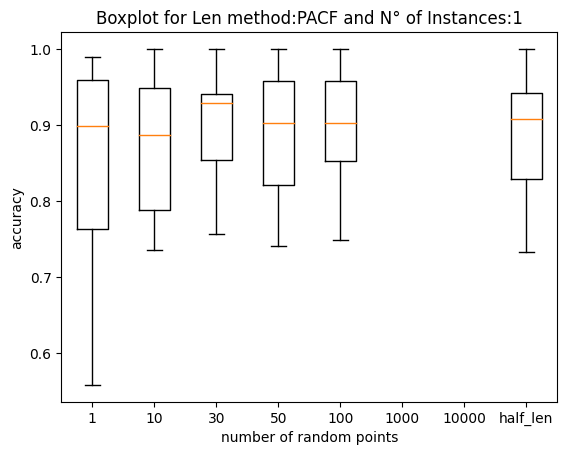

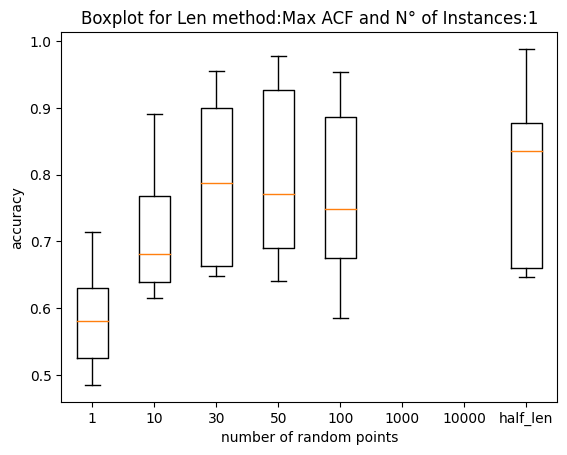

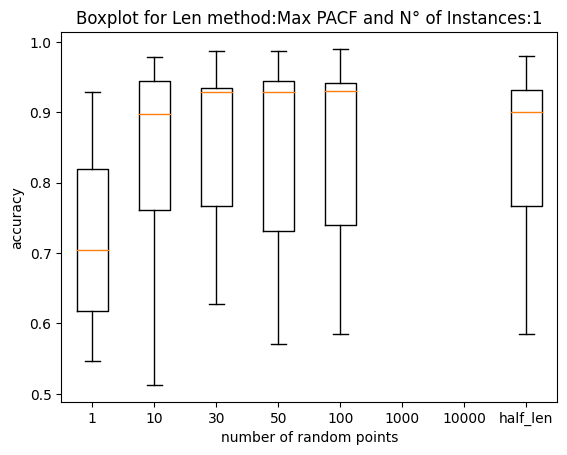

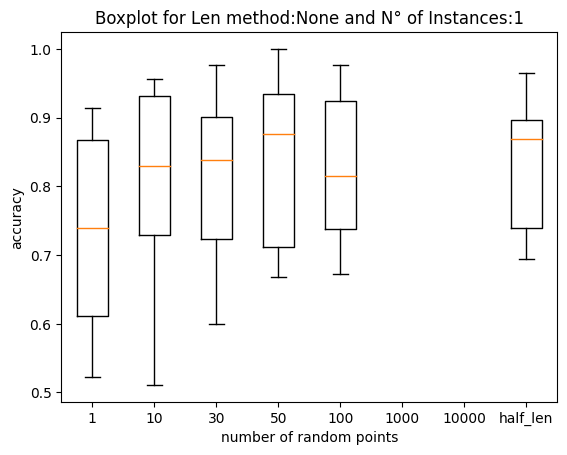

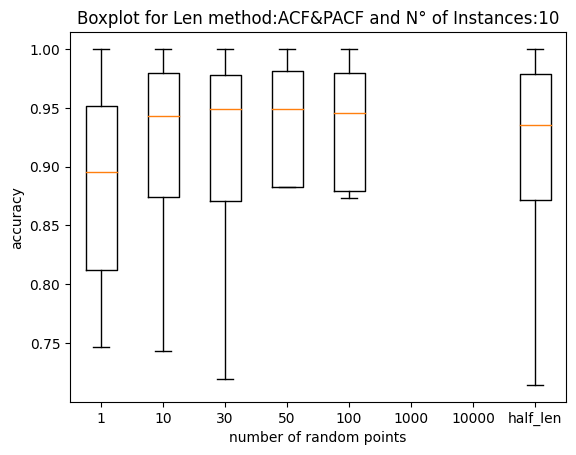

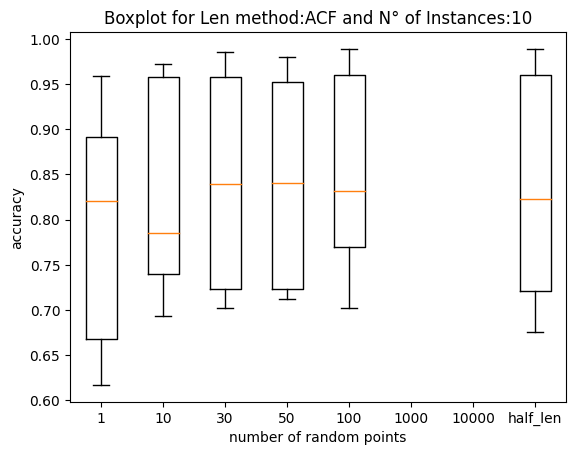

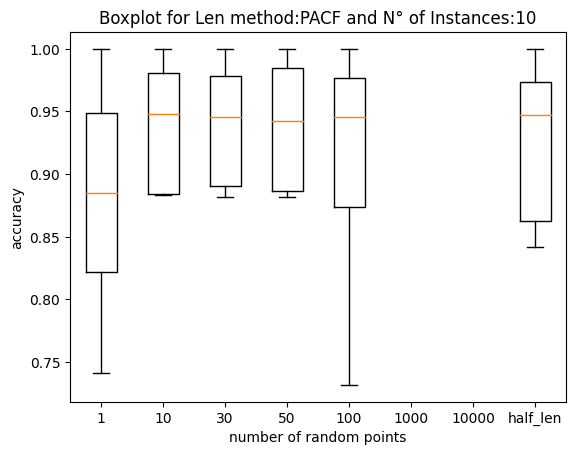

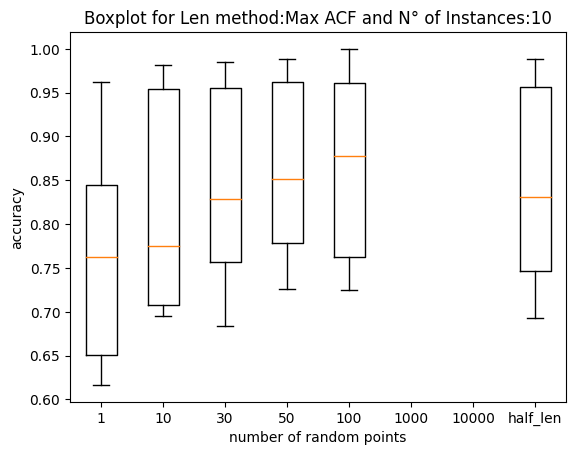

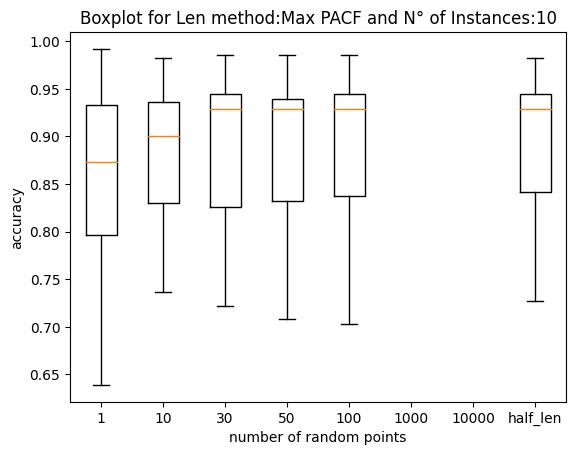

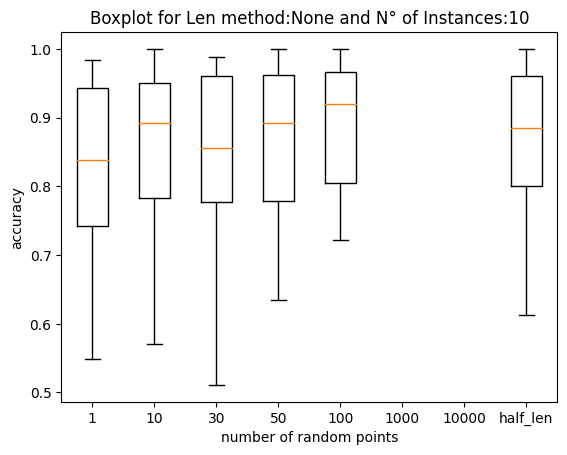

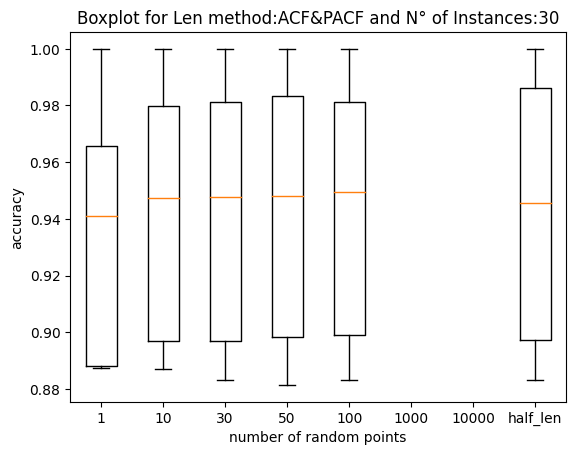

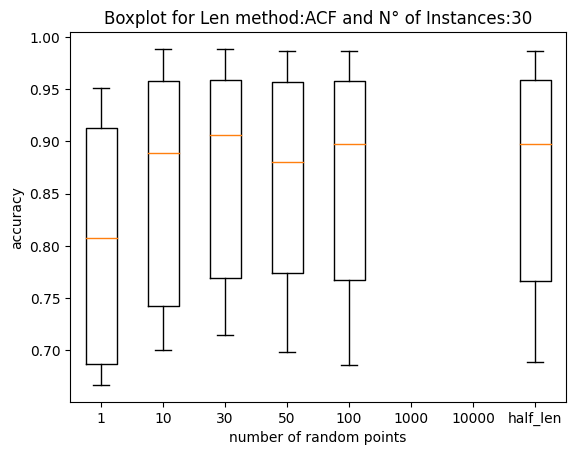

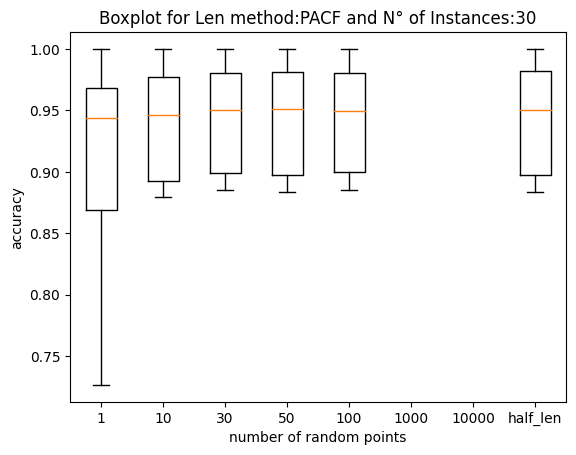

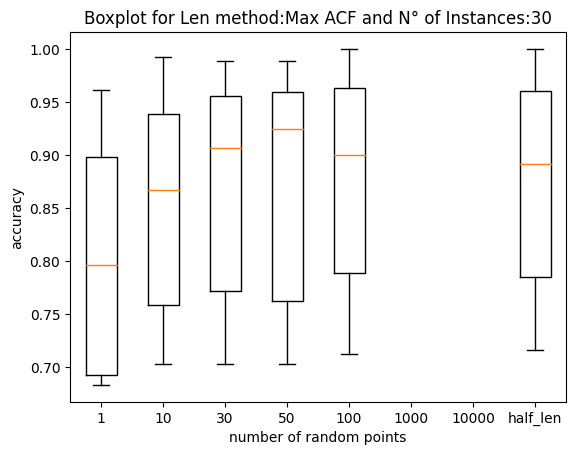

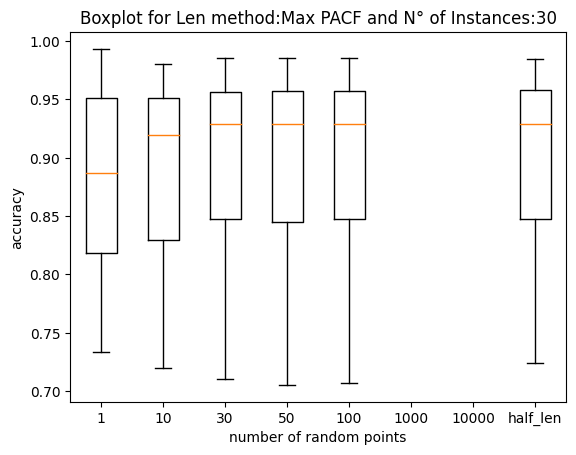

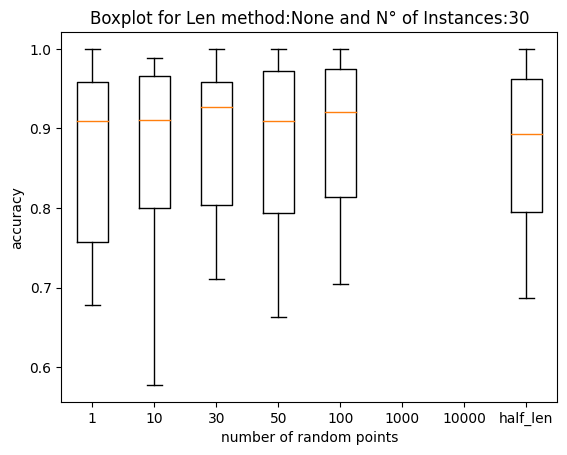

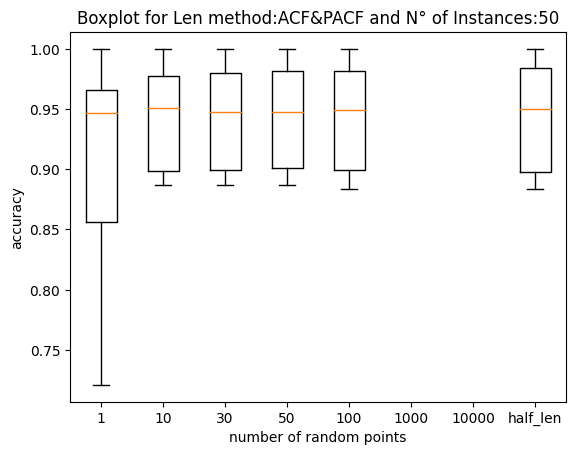

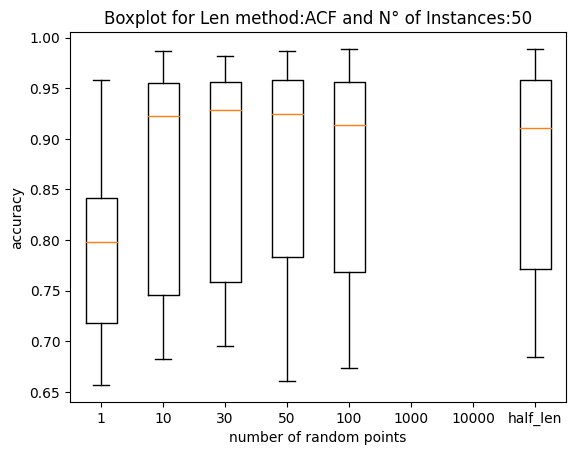

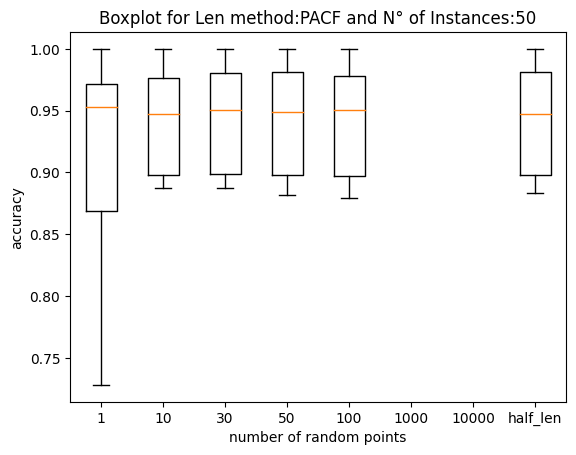

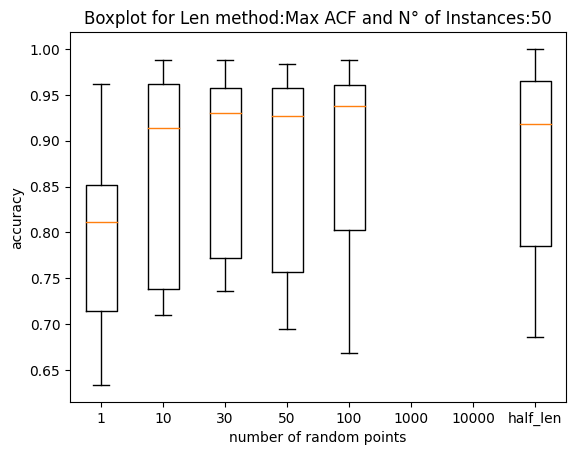

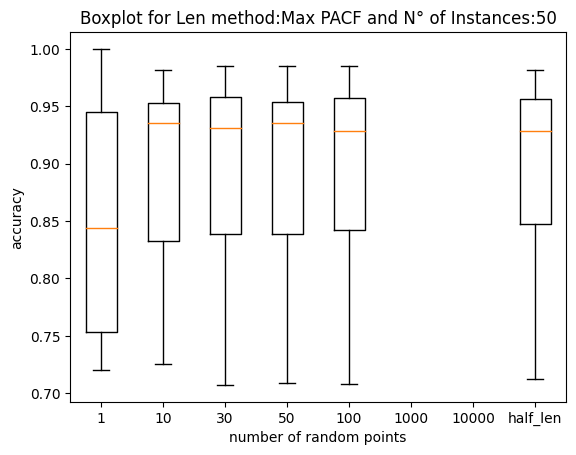

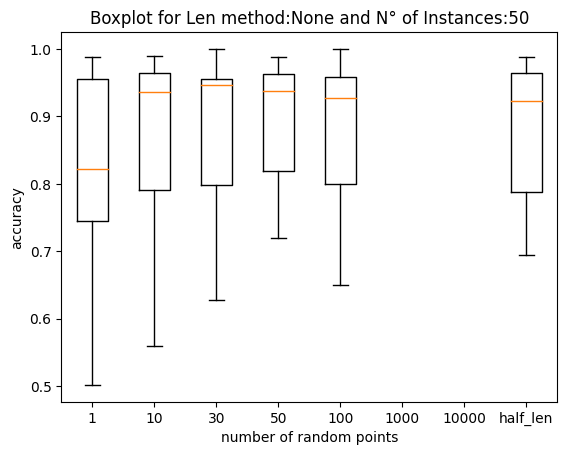

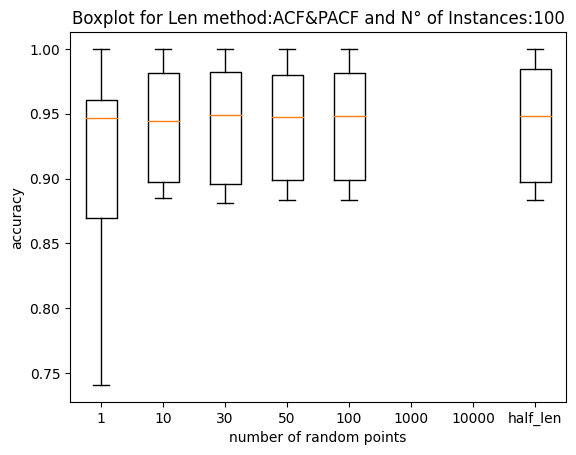

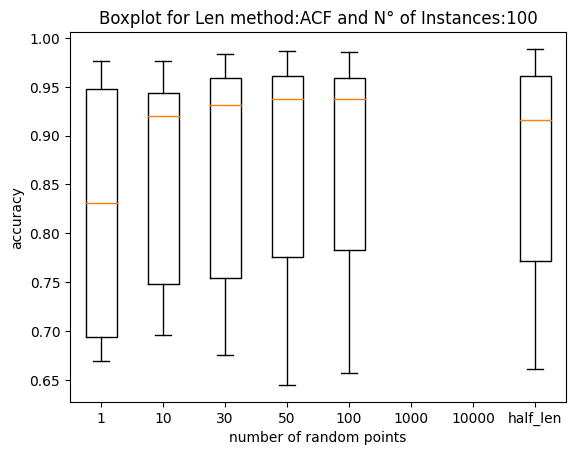

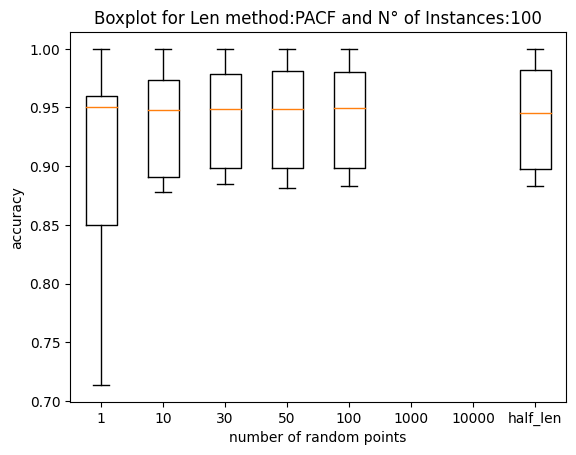

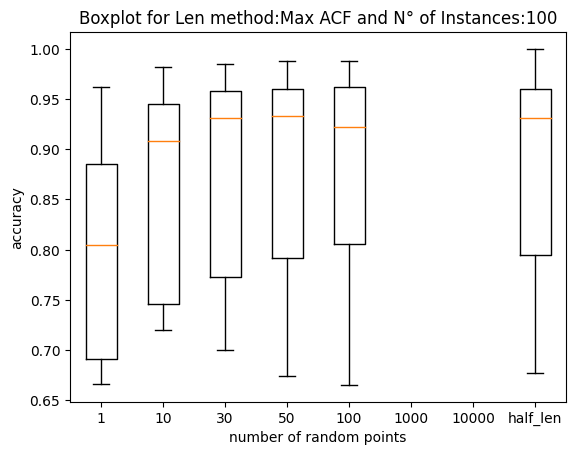

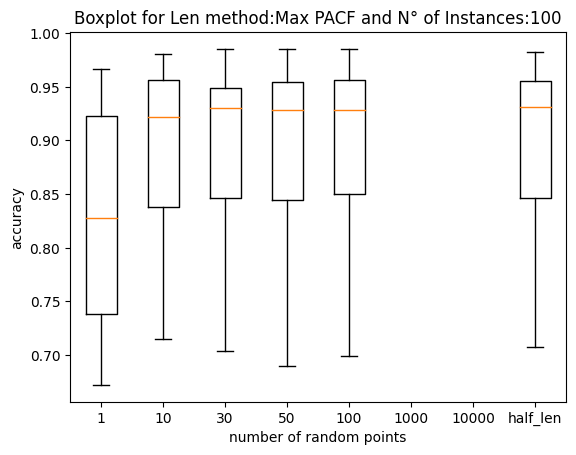

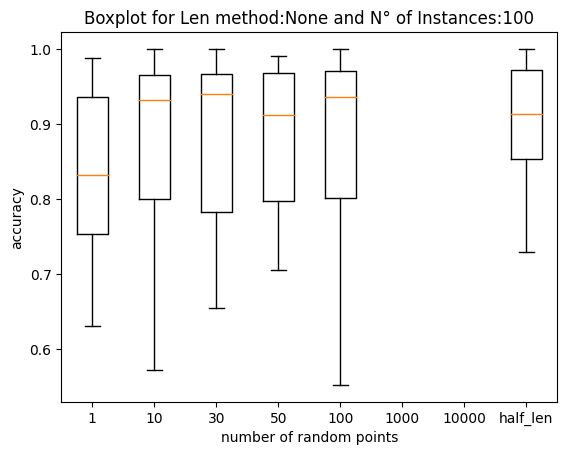

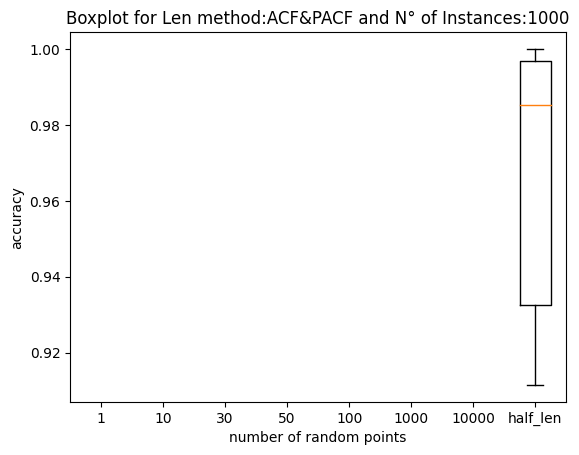

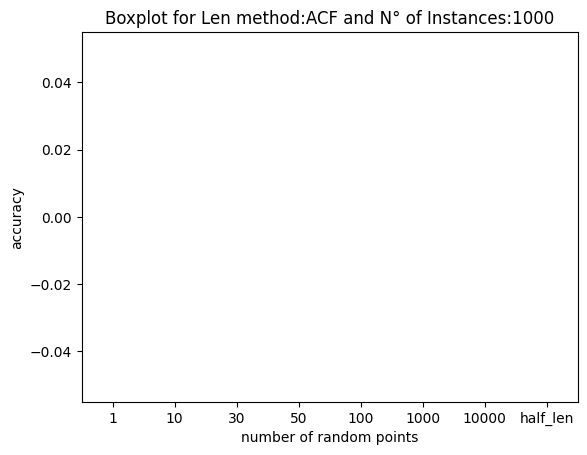

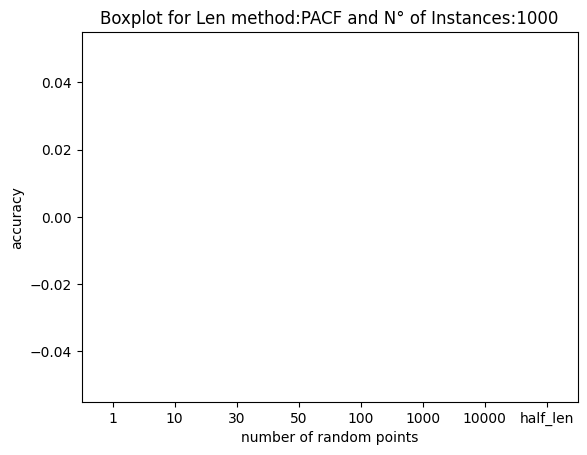

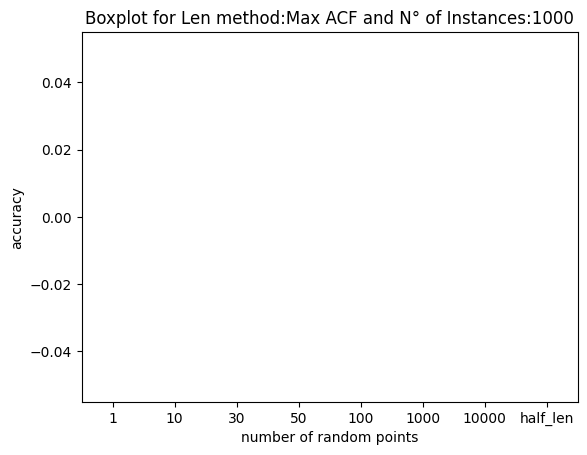

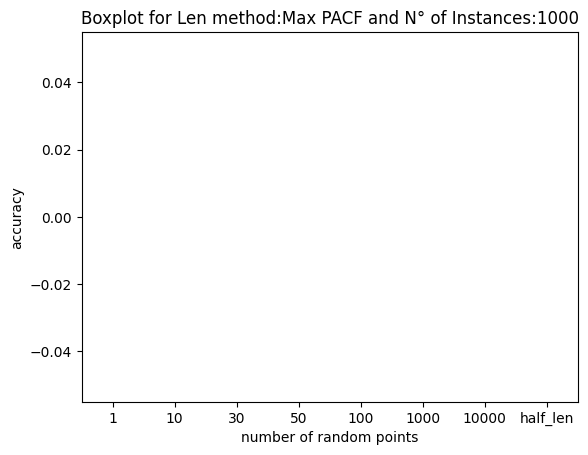

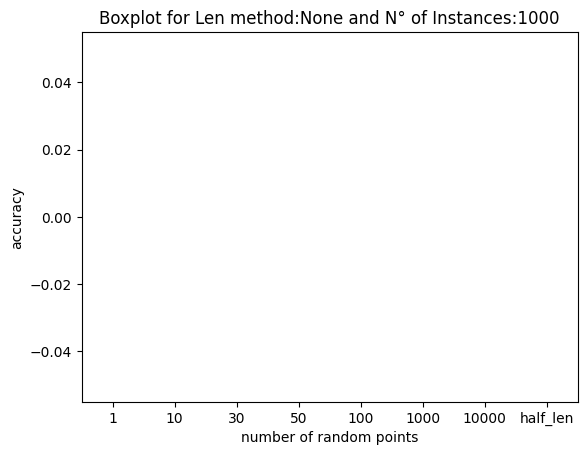

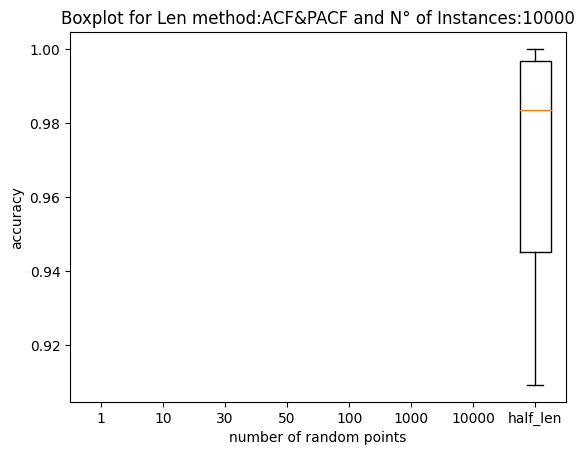

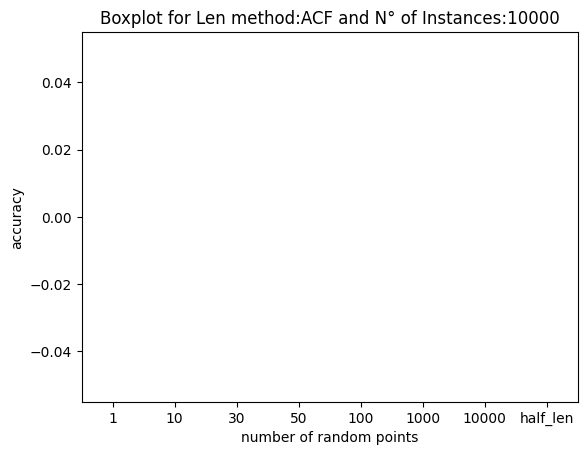

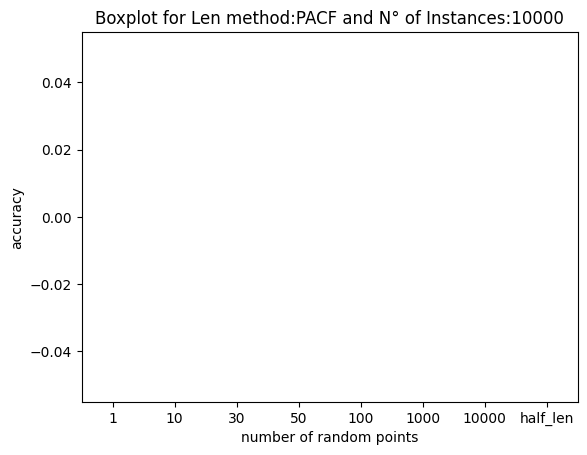

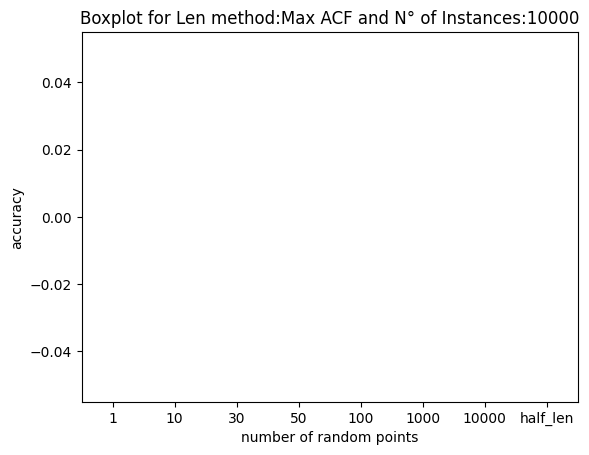

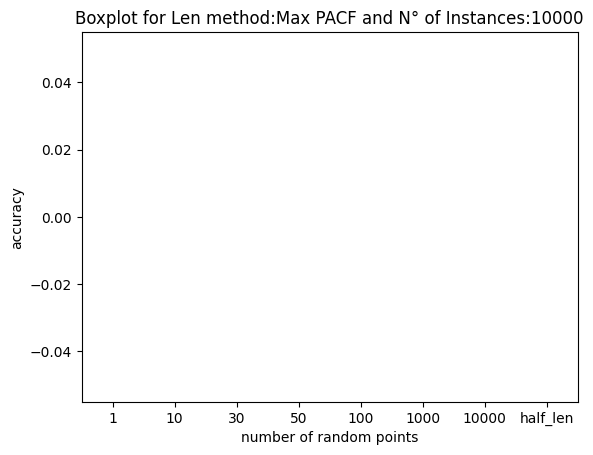

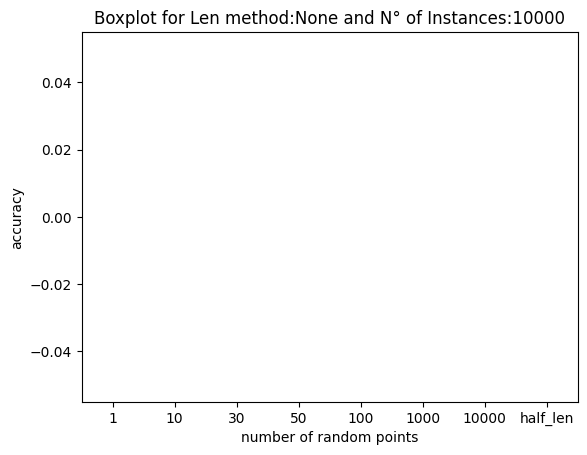

In [95]:
#generate hyperparameter tuning boxplots

df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name','rpoint'], aggfunc='mean')
df_perf=df_perf.reset_index()

for k, ints in enumerate(df_result.nb_per_class.unique()):

    for len_m in df_result.len_method.unique():
        
        
        df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
        df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name'], columns=['rpoint'],values='accuracy')
        df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100", "1000", "10000","half_len"])
        
        #print(df_to_cd.head(5))

        # Plot
        fig, ax = plt.subplots()
        
        
        #order=list(df_to_cd)
        plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)

        # Axis details
        ax.set(xlabel='number of random points', ylabel='accuracy', title='Boxplot for Len method:'+len_m+' and N° of Instances:'+ints)
        #plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
        print(df_to_cd.describe())

        # save plot
        plt.savefig('images_boxplot/boxplot_'+len_m+ints+'.png')




#### Generate CD Diagram Tunning Hyperparameter

In [96]:
from cd_function import *
#generate hyperparameter tuning cd diagrams
for k,ints in enumerate(df_result.nb_per_class.unique()):
   for len_m in df_result.len_method.unique():
      df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
      print('len_method'+str(len_m))
      print('nb_per_class'+str(ints))
      draw_cd_diagram(df_to_cd, labels=True, title=len_m +" comparison, nb_inst_per_class="+str(ints), name_file='images_cd_diagram/cd-diagram_'+len_m+ints+'.png')


len_methodACF&PACF
nb_per_classhalf_instance


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodACF
nb_per_classhalf_instance


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodPACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_classhalf_instance


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


the null hypothesis over the entire classifiers cannot be rejected
len_methodMax PACF
nb_per_classhalf_instance


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodACF&PACF
nb_per_class1
len_methodACF
nb_per_class1


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodPACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_class1


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodMax PACF
nb_per_class1
len_methodNone
nb_per_class1


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodACF&PACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF
nb_per_class10


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodPACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_class10


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodMax PACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_class10


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodACF&PACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF
nb_per_class30


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodPACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/random_sast/cd_diagram/cd_function.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(width, height))


len_methodMax ACF
nb_per_class30
len_methodMax PACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodNone
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodACF
nb_per_class50
len_methodPACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodMax ACF
nb_per_class50
len_methodMax PACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodNone
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodACF
nb_per_class100
len_methodPACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodMax ACF
nb_per_class100
len_methodMax PACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


len_methodNone
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class1000


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


ValueError: At least 3 sets of samples must be given for Friedman test, got 1.

In [ ]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

#### Focus on most accurate lenght method

##### Overall Accuracy

In [ ]:
# highest accurate hyperparameters
average_ranks[average_ranks[0]==min_rank][0].index

NameError: name 'average_ranks' is not defined

In [99]:
# filter by method with ACF&PACF
# create a pivot table with the mean of score by hyperparameter
df_result_acc=df_result[df_result["len_method"]=="PACF"]
df_result_acc=df_result_acc[df_result_acc["dataset_name"]=="Fungi"]

pivot = pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,1.000000,1.000000,1.0,1.0,1.0,1.000000,NaN,NaN
1,0.994624,0.989247,1.0,1.0,1.0,0.989247,NaN,NaN
10,1.000000,0.994624,1.0,1.0,1.0,1.000000,NaN,NaN
30,1.000000,1.000000,1.0,1.0,1.0,1.000000,NaN,NaN
50,1.000000,1.000000,1.0,1.0,1.0,1.000000,NaN,NaN
100,1.000000,1.000000,1.0,1.0,1.0,1.000000,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create a pivot table with the variatioon of score by hyperparameter
pivot = pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='var')
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,0.001375,0.006626,0.003172,0.001198,0.001009,0.001321,0.001482,0.001244
1,0.001661,0.021651,0.004752,0.001851,0.003790,0.002125,NaN,NaN
10,0.001999,0.005934,0.002996,0.001203,0.000975,0.001192,NaN,NaN
30,0.001299,0.007674,0.002950,0.001496,0.001051,0.001161,NaN,NaN
50,0.001963,0.002222,0.002547,0.001242,0.001005,0.000935,NaN,NaN
100,0.001370,0.005543,0.002485,0.001081,0.000876,0.001153,NaN,NaN
1000,0.001743,0.004922,0.002037,0.001788,0.001162,0.001126,NaN,NaN
10000,0.001595,0.005149,0.002282,0.001549,0.001228,0.001083,NaN,NaN


##### Overall time complexity

In [ ]:
# create a pivot table with the mean of time spent in minutes
pivot=pd.pivot_table(df_result_acc, values=['time','cweights_time','fsubsequence_time','tdataset_time','tclassifier_time'], index=['dataset_name'], aggfunc='mean')/60
pivot = pivot.reindex(columns=['cweights_time','fsubsequence_time','tdataset_time','tclassifier_time','time'])
pivot

,cweights_time,fsubsequence_time,tdataset_time,tclassifier_time,time
dataset_name,,,,,
Chinatown,0.000144,0.000994,0.001531,0.000209,0.002906
GunPoint,0.000639,0.031139,1.402525,0.001113,1.435575
SmoothSubspace,0.000102,0.002209,0.010340,0.002640,0.015324
SonyAIBORobotSurface2,0.000319,0.002637,0.032942,0.000248,0.036185


In [ ]:
# create a pivot table with the mean of time spent in minutes by random points and instances per class
pivot = pd.pivot_table(df_result_acc, values='time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')/60
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,0.365060,0.033580,0.289315,0.710070,0.713675,0.729366,0.725937,0.728071
1,0.041609,0.014691,0.014861,0.027817,0.024922,0.025671,NaN,NaN
10,0.056956,0.012027,0.054366,0.122231,0.124822,0.124887,NaN,NaN
30,0.155352,0.019832,0.140973,0.341366,0.343249,0.338935,NaN,NaN
50,0.246738,0.029340,0.227873,0.554460,0.558782,0.559568,NaN,NaN
100,0.451091,0.039133,0.428514,1.041315,1.045938,1.042353,NaN,NaN
1000,0.595801,0.026801,0.184448,0.433707,0.432775,0.432414,NaN,NaN
10000,0.563021,0.019574,0.177844,0.465054,0.488714,0.456792,NaN,NaN


##### Calculate weights time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='cweights_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

nb_per_class,1,10,100,1000,10000,30,50,half_instance
rpoint,,,,,,,,
1,0.017604,0.020007,0.018430,NaN,NaN,0.020262,0.021097,0.029543
10,0.019363,0.018987,0.014016,NaN,NaN,0.014815,0.020272,0.017201
100,0.017604,0.013419,0.018166,NaN,NaN,0.014739,0.019486,0.018154
1000,0.014287,0.013114,0.012154,NaN,NaN,0.011344,0.016621,0.019891
10000,0.013022,0.013982,0.012907,NaN,NaN,0.012067,0.013814,0.016851
30,0.021165,0.016102,0.017665,NaN,NaN,0.016200,0.017681,0.020399
50,0.015121,0.017775,0.018636,NaN,NaN,0.012195,0.019424,0.018907
half_len,0.020171,0.023636,0.014964,0.016867,0.016596,0.021947,0.017721,0.017411


##### Finding subsequences time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='fsubsequence_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

##### Transform Dataset time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='tdataset_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

##### Classifier time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='tclassifier_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')